# Hanscom Project
#### To figure out the proportion of private jets (Business jets) and explore the necessity of expansive of Hanscom Airport out of the consideration of the air pollution.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *

### Merge all datasets together to get a final dataset

In [361]:
df = pd.read_csv('/Users/leowu/Desktop/Intern--IPS/Hanscom_dataset/Flight/1.csv')
df.head()

,flight,callsign,operator_icao,operator_name,airline_icao,airline_name,equipment,registration,origin_icao,origin_iata,...,destination_icao,destination_iata,destination_name,destination_city,destination_country,date_landed,time_landed,flight_time,fr24_flight_id,service_type
0,1I340,EJA340,EJA,NetJets,EJA,NetJets,E55P,N340QS,KBED,BED,...,KHPN,HPN,White Plains Westchester County Airport,White Plains,UNITED STATES,2022-01-01,00:41:51,0:36,710684837,Business Jets
1,NaN,N468QS,EJA,NetJets,NaN,NaN,GLF4,N468QS,KBED,BED,...,KSLC,SLC,Salt Lake City International Airport,Salt Lake City,UNITED STATES,2022-01-01,06:08:40,5:21,710690413,Business Jets
2,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBGR,BGR,...,KBED,BED,Bedford Hanscom Field,Bedford,UNITED STATES,2022-01-01,02:50:19,0:55,710698625,General Aviation
3,1I635,EJA635,EJA,NetJets,EJA,NetJets,C68A,N635QS,KBED,BED,...,KACK,ACK,Nantucket Memorial Airport,Nantucket,UNITED STATES,2022-01-01,02:38:15,0:24,710700113,Business Jets
4,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBED,BED,...,KBGR,BGR,Bangor International Airport,Bangor,UNITED STATES,2022-01-01,05:23:04,0:47,710708954,General Aviation


In [362]:
df_final=df.copy()

In [363]:
for i in range(2, 83):
    df = pd.read_csv(f'/Users/leowu/Desktop/Intern--IPS/Hanscom_dataset/Flight/{i}.csv')
    df_final = pd.concat([df_final, df])

In [411]:
df_final = df_final.drop_duplicates()
df_final.shape

(86823, 32)

In [412]:
df_final.head()

,flight,callsign,operator_icao,operator_name,airline_icao,airline_name,equipment,registration,origin_icao,origin_iata,...,flight_time,fr24_flight_id,service_type,hour,minute,duration,flight_type,year,month,YM
0,1I340,EJA340,EJA,NetJets,EJA,NetJets,E55P,N340QS,KBED,BED,...,0:36,710684837,Business Jets,0,36,36,Short,2022,1,2022_1
1,NaN,N468QS,EJA,NetJets,NaN,NaN,GLF4,N468QS,KBED,BED,...,5:21,710690413,Business Jets,5,21,321,Medium,2022,1,2022_1
2,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBGR,BGR,...,0:55,710698625,General Aviation,0,55,55,Short,2022,1,2022_1
3,1I635,EJA635,EJA,NetJets,EJA,NetJets,C68A,N635QS,KBED,BED,...,0:24,710700113,Business Jets,0,24,24,Short,2022,1,2022_1
4,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBED,BED,...,0:47,710708954,General Aviation,0,47,47,Short,2022,1,2022_1


## Data Clean

##### Replace those missing date with the previous record

In [ ]:
df_final['date_takeoff'].fillna(method='ffill', inplace=True)

##### Create a new column represents the combination of year and month

In [ ]:
df_final['YM'] = df_final['year'].astype('str') + '_' + df_final['month'].astype('str')

##### Generate the time information

In [ ]:
df_final['hour'] = [int(i.split(':')[0]) if pd.notna(i) else -1 for i in df_final['flight_time']]
df_final['minute'] = [int(i.split(':')[1]) if pd.notna(i) else -1 for i in df_final['flight_time']]
df_final['duration'] = 60*df_final.hour + df_final.minute

##### Classify flight type according to the flight duration
###### short: 0-3h, medium: 3-6h, long: 6+h

In [ ]:
df_final['flight_type'] = ['Short' if 0 < duration <= 180 else
                           'Medium' if 180 < duration <= 360 else
                           'Long' if duration > 360 else 'Missing'
                           for duration in df_final['duration'].fillna(-1)]

In [413]:
df_final1 = df_final.copy().rename(columns={'duration':'duration(min)'})

In [414]:
df_final1.head()

,flight,callsign,operator_icao,operator_name,airline_icao,airline_name,equipment,registration,origin_icao,origin_iata,...,flight_time,fr24_flight_id,service_type,hour,minute,duration(min),flight_type,year,month,YM
0,1I340,EJA340,EJA,NetJets,EJA,NetJets,E55P,N340QS,KBED,BED,...,0:36,710684837,Business Jets,0,36,36,Short,2022,1,2022_1
1,NaN,N468QS,EJA,NetJets,NaN,NaN,GLF4,N468QS,KBED,BED,...,5:21,710690413,Business Jets,5,21,321,Medium,2022,1,2022_1
2,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBGR,BGR,...,0:55,710698625,General Aviation,0,55,55,Short,2022,1,2022_1
3,1I635,EJA635,EJA,NetJets,EJA,NetJets,C68A,N635QS,KBED,BED,...,0:24,710700113,Business Jets,0,24,24,Short,2022,1,2022_1
4,NaN,N901LM,NaN,NaN,NaN,NaN,BE20,N901LM,KBED,BED,...,0:47,710708954,General Aviation,0,47,47,Short,2022,1,2022_1


In [415]:
df1 = df_final1[((df_final1.origin_icao != 'KBED') & (df_final1.destination_icao=='KBED')) |
         ((df_final1.origin_icao == 'KBED') & (df_final1.destination_icao !='KBED'))]

In [416]:
df1.shape

(72087, 32)

In [417]:
df11 = df1[df1.origin_icao == 'KBED']
df12 = df1[df1.destination_icao == 'KBED']

In [418]:
df11.shape

(36262, 32)

In [419]:
df12.shape

(35825, 32)

In [421]:
df_final2 = df_final1[df_final1.service_type=='Business Jets'].reset_index().drop(columns='index')
df_final2

,flight,callsign,operator_icao,operator_name,airline_icao,airline_name,equipment,registration,origin_icao,origin_iata,...,flight_time,fr24_flight_id,service_type,hour,minute,duration(min),flight_type,year,month,YM
0,1I340,EJA340,EJA,NetJets,EJA,NetJets,E55P,N340QS,KBED,BED,...,0:36,710684837,Business Jets,0,36,36,Short,2022,1,2022_1
1,NaN,N468QS,EJA,NetJets,NaN,NaN,GLF4,N468QS,KBED,BED,...,5:21,710690413,Business Jets,5,21,321,Medium,2022,1,2022_1
2,1I635,EJA635,EJA,NetJets,EJA,NetJets,C68A,N635QS,KBED,BED,...,0:24,710700113,Business Jets,0,24,24,Short,2022,1,2022_1
3,LXJ459,LXJ459,LXJ,Flexjet,LXJ,Flexjet,GLF4,N459FX,LFPB,LBG,...,7:21,710715299,Business Jets,7,21,441,Long,2022,1,2022_1
4,1I116,EJA116,EJA,NetJets,EJA,NetJets,GL5T,N116QS,KBED,BED,...,1:39,710733476,Business Jets,1,39,99,Short,2022,1,2022_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,LAK567,LAK567,LAK,Red Wing Aviation,LAK,Red Wing Aviation,C560,N567RW,KBVY,BVY,...,0:12,824698491,Business Jets,0,12,12,Short,2023,7,2023_7
31595,JL640,JTL640,JTL,Jet Linx Aviation,JTL,Jet Linx Aviation,C56X,N640AK,KBED,BED,...,1:51,824701056,Business Jets,1,51,111,Short,2023,7,2023_7
31596,PJC22,PJC22,PJC,Pittsburgh Jet Center,PJC,Pittsburgh Jet Center,C56X,N422BC,KBWI,BWI,...,1:09,824704829,Business Jets,1,9,69,Short,2023,7,2023_7
31597,EJA113,EJA113,EJA,NetJets,EJA,NetJets,GL5T,N113QS,KBED,BED,...,1:01,824707234,Business Jets,1,1,61,Short,2023,7,2023_7


In [422]:
dff1 = df_final2[((df_final2.origin_icao != 'KBED') & (df_final2.destination_icao=='KBED')) |
         ((df_final2.origin_icao == 'KBED') & (df_final2.destination_icao !='KBED'))].reset_index().\
drop(columns='index')

In [425]:
dff11 = dff1[dff1.origin_icao == 'KBED'].reset_index().drop(columns='index')
dff12 = dff1[dff1.destination_icao == 'KBED'].reset_index().drop(columns='index')

In [427]:
dff11.shape

(15781, 32)

In [428]:
dff12.shape

(15735, 32)

## Data Visualization -- Private Jets

#### Flight Number by Month

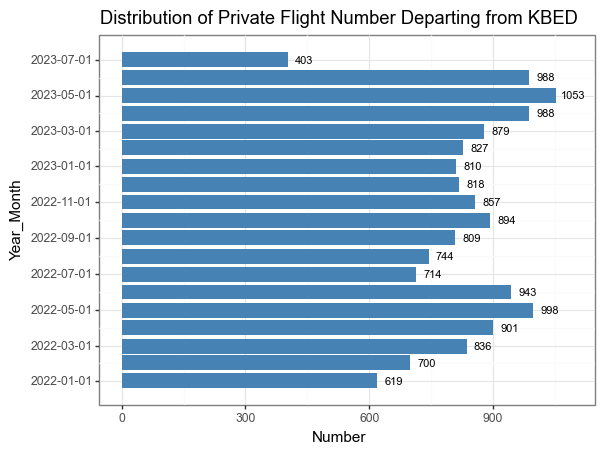

<ggplot: (8769309561238)>

In [429]:
dfcc1 = dff11.YM.value_counts().reset_index()
# Convert 'YM' to datetime format
dfcc1['ym'] = pd.to_datetime(dfcc1['index'], format='%Y_%m')

# Sort the DataFrame based on the 'YM' column
dfcc1 = dfcc1.sort_values('ym')

# Create the plot
(ggplot(dfcc1, aes(x='ym', y='YM')) +
 geom_bar(stat='identity', position='dodge', fill='steelblue') +
 geom_text(aes(label='YM'), nudge_y=40, size=8) +
 labs(title='Distribution of Private Flight Number Departing from KBED', x='Year_Month', y='Number') +
 theme_bw() +
 theme(text=element_text(family='Arial')) +
 coord_flip())

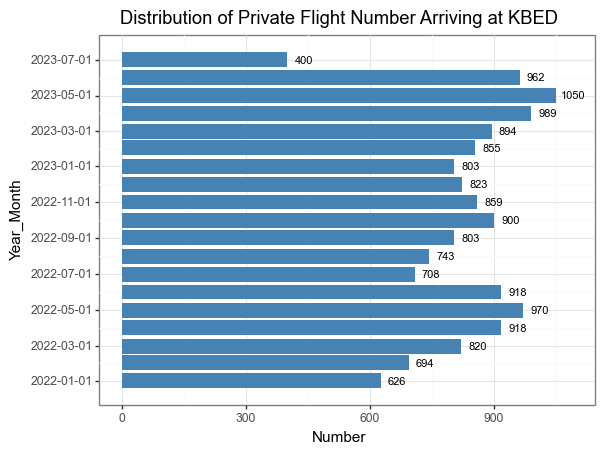

<ggplot: (8769365696413)>

In [430]:
dfcc1 = dff12.YM.value_counts().reset_index()
# Convert 'YM' to datetime format
dfcc1['ym'] = pd.to_datetime(dfcc1['index'], format='%Y_%m')

# Sort the DataFrame based on the 'YM' column
dfcc1 = dfcc1.sort_values('ym')

# Create the plot
(ggplot(dfcc1, aes(x='ym', y='YM')) +
 geom_bar(stat='identity', position='dodge', fill='steelblue') +
 geom_text(aes(label='YM'), nudge_y=40, size=8) +
 labs(title='Distribution of Private Flight Number Arriving at KBED', x='Year_Month', y='Number') +
 theme_bw() +
 theme(text=element_text(family='Arial')) +
 coord_flip())

#### Top 10 Arrival/Departure Countries (Except the US)

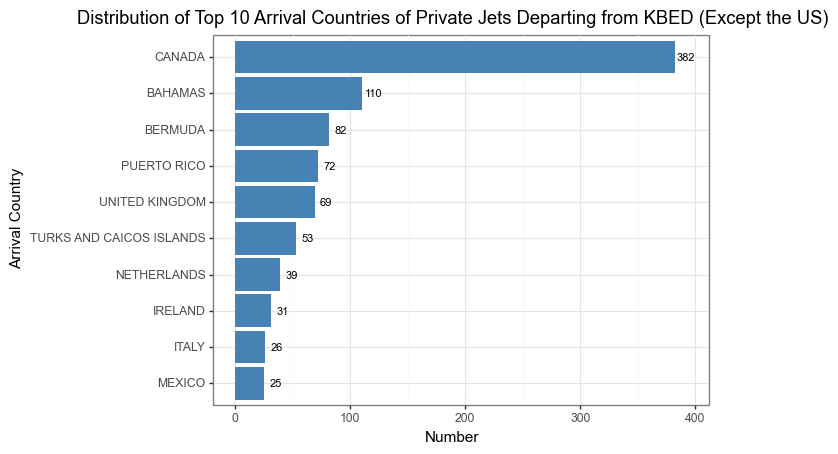

<ggplot: (8769327685428)>

In [433]:
dfdc1 = dff11.destination_country.value_counts().reset_index()[1:11]

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('destination_country')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='destination_country')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='destination_country'), nudge_y=10, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Arrival Countries of Private Jets Departing from KBED (Except the US)', x='Arrival Country', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

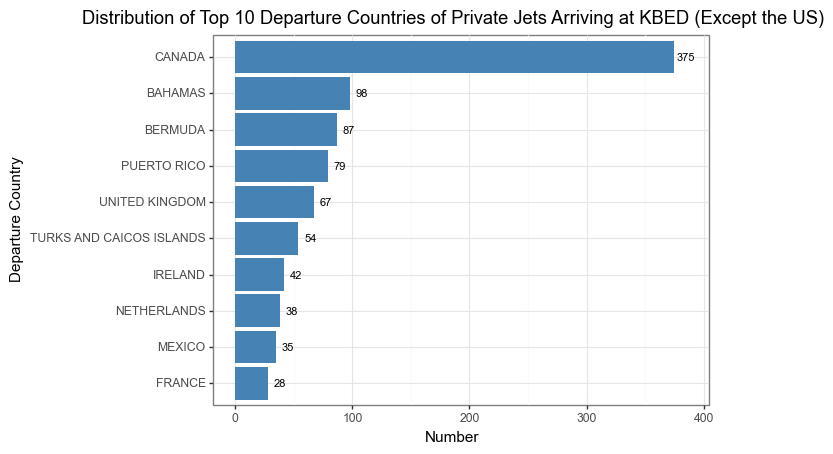

<ggplot: (8769245578517)>

In [434]:
dfdc1 = dff12.origin_country.value_counts().reset_index()[1:11]

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('origin_country')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='origin_country')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='origin_country'), nudge_y=10, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Departure Countries of Private Jets Arriving at KBED (Except the US)', x='Departure Country', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### Top 10 Arrival/Departure Cities in the US

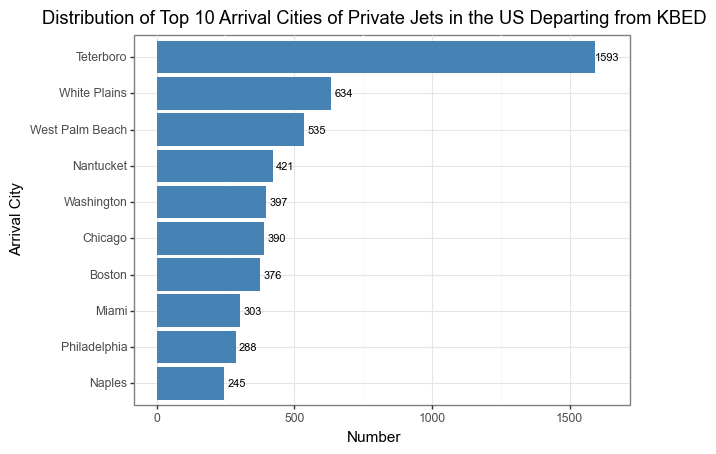

<ggplot: (8769245775155)>

In [437]:
dfdc1 = dff11[dff11.destination_country=='UNITED STATES'].destination_city.value_counts().reset_index().head(10)

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('destination_city')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='destination_city')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='destination_city'), nudge_y=45, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Arrival Cities of Private Jets in the US Departing from KBED', x='Arrival City', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

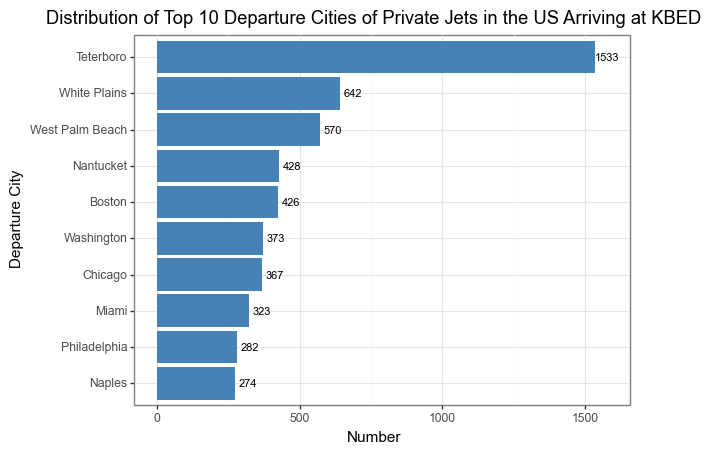

<ggplot: (8769245567730)>

In [438]:
dfdc1 = dff12[dff12.origin_country=='UNITED STATES'].origin_city.value_counts().reset_index().head(10)

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('origin_city')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='origin_city')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='origin_city'), nudge_y=45, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Departure Cities of Private Jets in the US Arriving at KBED', x='Departure City', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### DIstribution of Flight type (Number) (Short/Medium/Long)

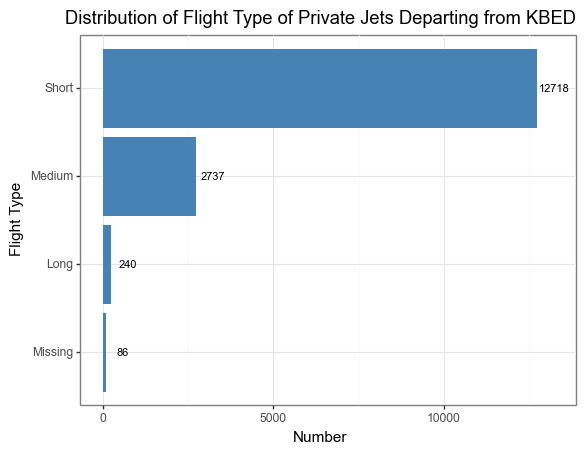

<ggplot: (8769309535788)>

In [468]:
dfdc1 = dff11.flight_type.value_counts().reset_index()

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('flight_type')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='flight_type')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='flight_type'), nudge_y=500, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Type of Private Jets Departing from KBED', x='Flight Type', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

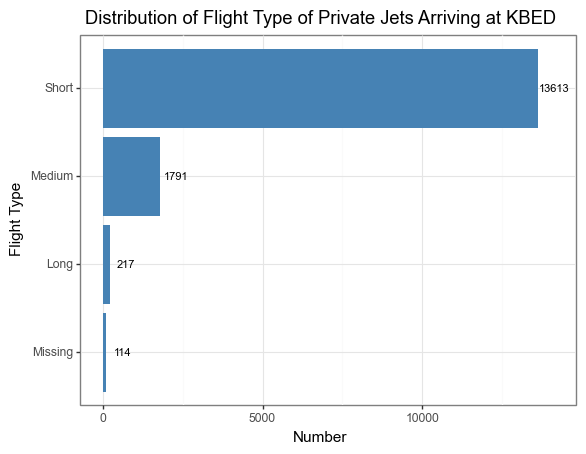

<ggplot: (8769293505654)>

In [452]:
dfdc1 = dff12.flight_type.value_counts().reset_index()

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('flight_type')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='flight_type')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='flight_type'), nudge_y=500, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Type of Private Jets Arriving at KBED', x='Flight Type', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### DIstribution of Flight type (Proportion)  (Short/Medium/Long)

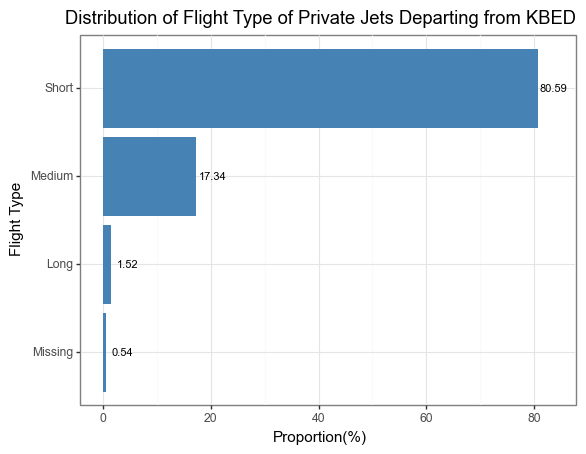

<ggplot: (8769326971406)>

In [473]:
dfdc1 = dff11.flight_type.value_counts().reset_index()
dfdc1['sum'] = dfdc1['flight_type'].sum()
dfdc1['prop'] = round(dfdc1.flight_type/dfdc1['sum']*100,2)

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('prop')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='prop')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='prop'), nudge_y=3, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Type of Private Jets Departing from KBED', x='Flight Type', y='Proportion(%)') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

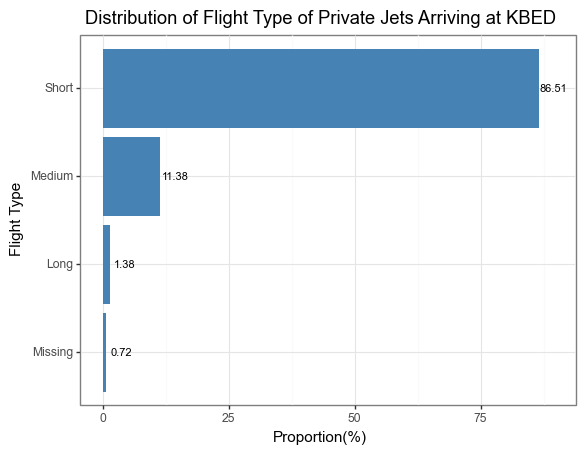

<ggplot: (8769309582541)>

In [474]:
dfdc1 = dff12.flight_type.value_counts().reset_index()
dfdc1['sum'] = dfdc1['flight_type'].sum()
dfdc1['prop'] = round(dfdc1.flight_type/dfdc1['sum']*100,2)

# Define the ordering based on 'Type' column
order = dfdc1.sort_values('prop')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='prop')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='prop'), nudge_y=3, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Type of Private Jets Arriving at KBED', x='Flight Type', y='Proportion(%)') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### Top 10 Airline Operators

In [463]:
dff11.operator_name.isna().sum()

4706

In [462]:
dff12.operator_name.isna().sum()

4690

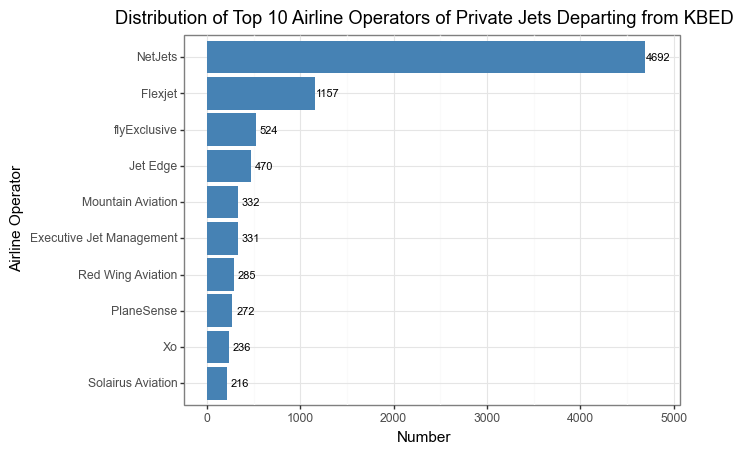

<ggplot: (8769295317926)>

In [465]:
dfdc1 = dff11.operator_name.value_counts().head(10).reset_index()
# Define the ordering based on 'Type' column
order = dfdc1.sort_values('operator_name')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='operator_name')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='operator_name'), nudge_y=140, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Airline Operators of Private Jets Departing from KBED', x='Airline Operator', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

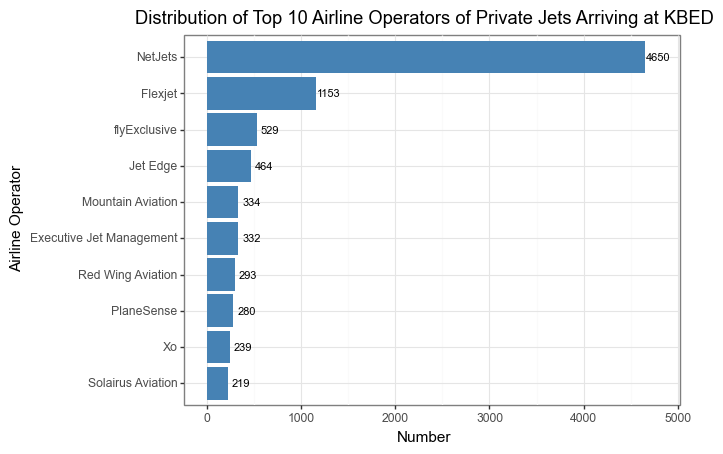

<ggplot: (8769342121297)>

In [466]:
dfdc1 = dff12.operator_name.value_counts().head(10).reset_index()
# Define the ordering based on 'Type' column
order = dfdc1.sort_values('operator_name')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='operator_name')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='operator_name'), nudge_y=140, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Airline Operators of Private Jets Arriving at KBED', x='Airline Operator', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### More specific classification of Flight Duration

In [505]:
dfc = pd.DataFrame({'duration':['<30min','<60min','<90min','<120min','<180min'],
                     'number':[2123,6434,8264,9646,12658],
                   'sum':[15695,15695,15695,15695,15695]})
dfc['Proportion'] = round(dfc['number']/dfc['sum']*100,2)

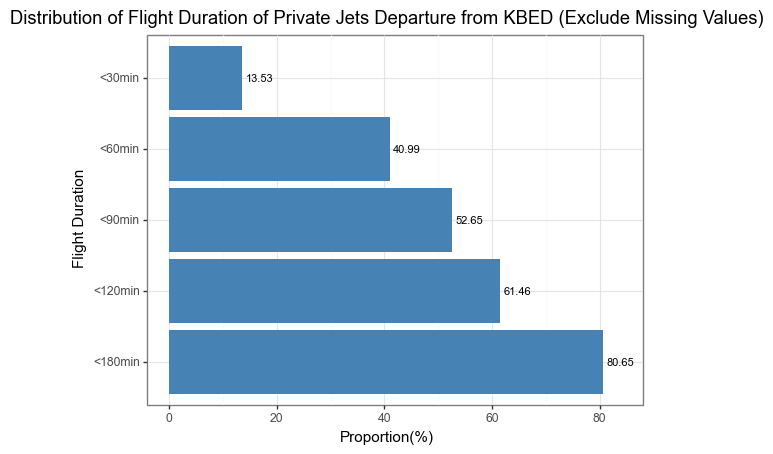

<ggplot: (8769297225302)>

In [510]:
# Define the ordering based on 'Type' column
order = dfc.sort_values('Proportion',ascending=False)['duration'].unique()

# Create the plot
ggplot(dfc, aes(x='duration', y='Proportion')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='Proportion'), nudge_y=3.2, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Duration of Private Jets Departure from KBED (Exclude Missing Values)', x='Flight Duration', y='Proportion(%)') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

In [517]:
dfc = pd.DataFrame({'duration':['<30min','<60min','<90min','<120min','<180min'],
                     'number':[1918,6932,8763,10492,13577],
                   'sum':[15621,15621,15621,15621,15621]})
dfc['Proportion'] = round(dfc['number']/dfc['sum']*100,2)

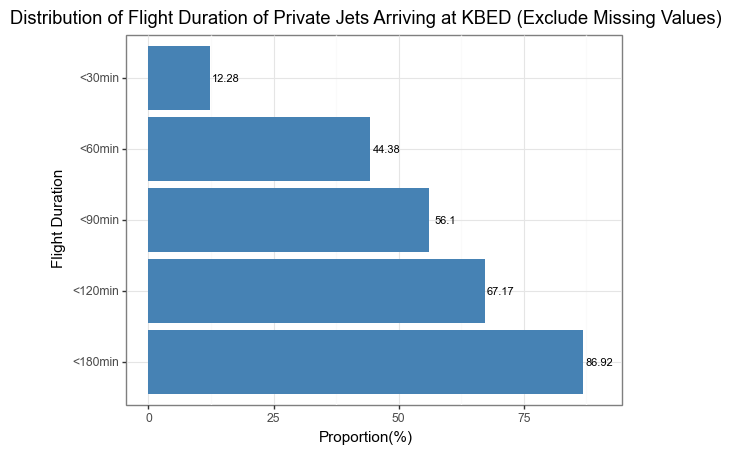

<ggplot: (8769296180146)>

In [518]:
# Define the ordering based on 'Type' column
order = dfc.sort_values('Proportion',ascending=False)['duration'].unique()

# Create the plot
ggplot(dfc, aes(x='duration', y='Proportion')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='Proportion'), nudge_y=3.2, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Flight Duration of Private Jets Arriving at KBED (Exclude Missing Values)', x='Flight Duration', y='Proportion(%)') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

#### Top 10 Registration Number

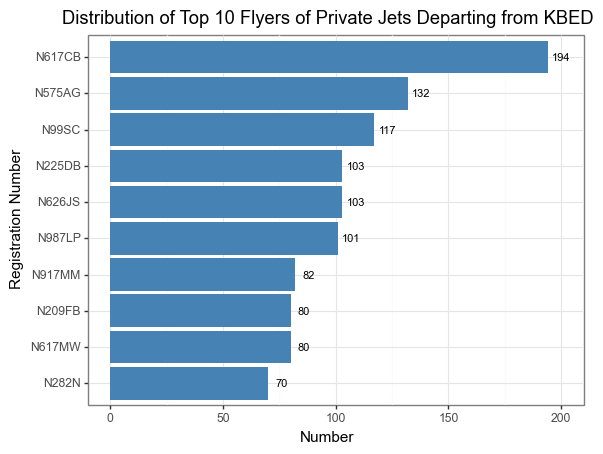

<ggplot: (8769297303889)>

In [527]:
dfdc1 = dff11.registration.value_counts().head(10).reset_index()
# Define the ordering based on 'Type' column
order = dfdc1.sort_values('registration')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='registration')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='registration'), nudge_y=6, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Flyers of Private Jets Departing from KBED', x='Registration Number', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()

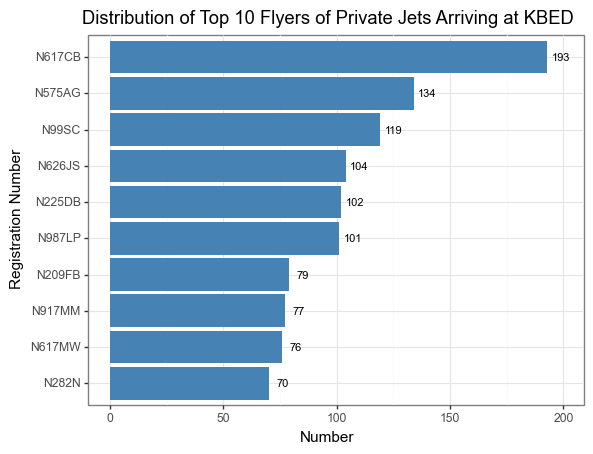

<ggplot: (8769327692029)>

In [528]:
dfdc1 = dff12.registration.value_counts().head(10).reset_index()
# Define the ordering based on 'Type' column
order = dfdc1.sort_values('registration')['index'].unique()

# Create the plot
ggplot(dfdc1, aes(x='index', y='registration')) + \
    geom_bar(stat='identity', position='dodge', fill='steelblue') + \
    geom_text(aes(label='registration'), nudge_y=6, size=8) + \
    scale_x_discrete(limits=order) + \
    labs(title='Distribution of Top 10 Flyers of Private Jets Arriving at KBED', x='Registration Number', y='Number') + \
    theme_bw() + \
    theme(text=element_text(family='Arial'))+ \
    coord_flip()